In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pt
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

from sklearn.tree import export_graphviz
from matplotlib import pyplot as plt
from sklearn import tree
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz
from sklearn.model_selection import GridSearchCV 
import pydotplus, graphviz

In [ ]:
!pip install pydotplus


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#conda install -c anaconda-graphviz
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
data_train = pd.read_csv('/content/data.csv')
data_test = pd.read_csv('/content/test.csv')

In [3]:
data_train.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [4]:
data_train['Severity'].value_counts(normalize=True)*100

Highly_Fatal_And_Damaging                  30.49
Significant_Damage_And_Serious_Injuries    27.29
Minor_Damage_And_Injuries                  25.27
Significant_Damage_And_Fatalities          16.95
Name: Severity, dtype: float64

# Exploratory Data Analysis

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Severity                 10000 non-null  object 
 1   Safety_Score             10000 non-null  float64
 2   Days_Since_Inspection    10000 non-null  int64  
 3   Total_Safety_Complaints  10000 non-null  int64  
 4   Control_Metric           10000 non-null  float64
 5   Turbulence_In_gforces    10000 non-null  float64
 6   Cabin_Temperature        10000 non-null  float64
 7   Accident_Type_Code       10000 non-null  int64  
 8   Max_Elevation            10000 non-null  float64
 9   Violations               10000 non-null  int64  
 10  Adverse_Weather_Metric   10000 non-null  float64
 11  Accident_ID              10000 non-null  int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 937.6+ KB


In [6]:
data_train.isnull().sum() # Checking if there is any null value in the dataset

Severity                   0
Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
dtype: int64

In [7]:
# Drop the target and check how the features correlate
data_train.drop("Severity", axis=1).corr()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
Safety_Score,1.000000,-0.685386,0.057726,0.000564,0.019603,0.032747,0.173930,0.004451,0.041735,-0.107925,-0.001334
Days_Since_Inspection,-0.685386,1.000000,-0.032055,-0.011963,-0.001564,-0.039140,-0.024718,0.000183,-0.016724,0.040804,0.000582
Total_Safety_Complaints,0.057726,-0.032055,1.000000,-0.019665,0.066412,0.013590,0.034927,0.036855,-0.019005,-0.002713,0.004527
Control_Metric,0.000564,-0.011963,-0.019665,1.000000,-0.643285,-0.008330,0.008385,-0.028375,-0.003284,-0.028296,0.006481
Turbulence_In_gforces,0.019603,-0.001564,0.066412,-0.643285,1.000000,0.010757,-0.007565,0.047625,0.013171,0.039802,-0.014396
Cabin_Temperature,0.032747,-0.039140,0.013590,-0.008330,0.010757,1.000000,0.030682,-0.009186,0.018619,-0.026647,0.014865
Accident_Type_Code,0.173930,-0.024718,0.034927,0.008385,-0.007565,0.030682,1.000000,0.019970,0.046379,-0.739361,-0.012278
Max_Elevation,0.004451,0.000183,0.036855,-0.028375,0.047625,-0.009186,0.019970,1.000000,-0.030513,0.173436,0.008576
Violations,0.041735,-0.016724,-0.019005,-0.003284,0.013171,0.018619,0.046379,-0.030513,1.000000,-0.021578,-0.002047
Adverse_Weather_Metric,-0.107925,0.040804,-0.002713,-0.028296,0.039802,-0.026647,-0.739361,0.173436,-0.021578,1.000000,0.008586


Observations  
Days since inspection has a strong -ve correlation with Safety Score  
Turbulence in gforces has a strong -ve correlation with Control Metric.   
Accident type code has a weak +ve correlation with the Safety Score.   
Adverse Weather Metric has a strong -ve correlation with Accident Type Code.   
Adverse Weather Metric has a weak +ve correlation with Max Elevation

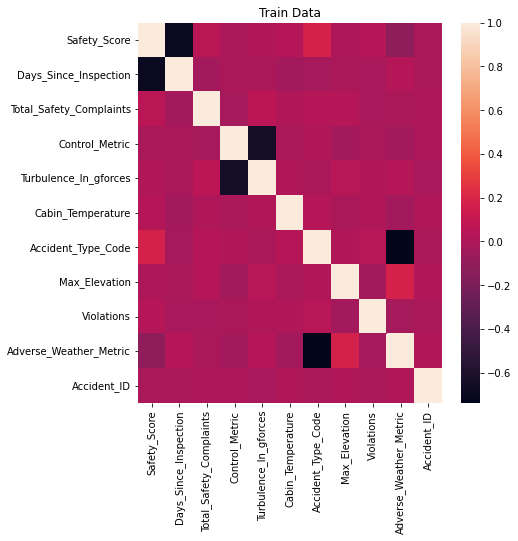

In [8]:
# Checking Corelation
pt.figure(figsize = (15, 7))
pt.subplot(1, 2, 1)
pt.title("Train Data")
sns.heatmap(data_train.corr())

In [9]:
data_train[data_train["Days_Since_Inspection"] == 1]

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
840,Significant_Damage_And_Serious_Injuries,58.675799,1,2,75.387420,0.336308,75.96,6,29146.687854,3,0.007526,9494
2283,Significant_Damage_And_Serious_Injuries,58.493151,1,5,75.387420,0.245792,76.11,6,16149.317704,3,0.003679,9705
2611,Highly_Fatal_And_Damaging,65.342466,1,19,77.848678,0.361191,79.65,2,31661.628810,2,0.429535,5430
7903,Highly_Fatal_And_Damaging,65.342466,1,8,58.204193,0.312146,79.43,2,28183.323130,2,0.382453,11009
8152,Significant_Damage_And_Serious_Injuries,58.493151,1,20,67.046490,0.409514,79.72,7,25135.851480,2,0.002300,361


In [10]:
# Checking the unique values for dependent Variable (Severity)
data_train.Severity.unique()

array(['Minor_Damage_And_Injuries', 'Significant_Damage_And_Fatalities',
       'Significant_Damage_And_Serious_Injuries',
       'Highly_Fatal_And_Damaging'], dtype=object)

In [11]:
# Checking the Unique Values in Accident_Type_Code
data_train.Accident_Type_Code.unique()

array([2, 7, 3, 4, 1, 6, 5])

In [12]:
# Checking the Unqiue Values in Violations
data_train.Violations.unique()

array([3, 2, 1, 0, 4, 5])

In [13]:
data_train['Severity'].describe()
# A description (4 level factor) on the severity of the crash

count                         10000
unique                            4
top       Highly_Fatal_And_Damaging
freq                           3049
Name: Severity, dtype: object

In [14]:
data_train['Safety_Score'].describe() 
# It gives a measure of how safe the plane was deemed to be.

count    10000.000000
mean        41.876406
std         16.138072
min          0.000000
25%         30.593607
50%         41.278539
75%         52.511416
max        100.000000
Name: Safety_Score, dtype: float64

In [15]:
data_train['Days_Since_Inspection'].describe() 
# It gives measure of how long the plane without inspection before incident

count    10000.000000
mean        12.931100
std          3.539803
min          1.000000
25%         11.000000
50%         13.000000
75%         15.000000
max         23.000000
Name: Days_Since_Inspection, dtype: float64

In [16]:
data_train['Total_Safety_Complaints'].describe()
# No. of complaints from mechanics prior to accident.

count    10000.000000
mean         6.564300
std          6.971982
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         54.000000
Name: Total_Safety_Complaints, dtype: float64

In [17]:
data_train['Control_Metric'].describe()
# An estimation of how much control the pilot had during the incident given the factors at play.

count    10000.000000
mean        65.145324
std         11.882934
min          0.000000
25%         56.927985
50%         65.587967
75%         73.336372
max        100.000000
Name: Control_Metric, dtype: float64

In [18]:
data_train['Turbulence_In_gforces'].describe()
# Recorded turbulence experienced at the time of accident.

count    10000.000000
mean         0.381495
std          0.121301
min          0.134000
25%          0.293665
50%          0.365879
75%          0.451346
max          0.882648
Name: Turbulence_In_gforces, dtype: float64

In [19]:
data_train['Cabin_Temperature'].describe()
# Last recorded temp before incident.

count    10000.000000
mean        79.969331
std          2.759739
min         74.740000
25%         77.960000
50%         79.540000
75%         81.560000
max         97.510000
Name: Cabin_Temperature, dtype: float64

In [20]:
data_train['Cabin_Temperature'].describe()
# Last recorded temp before incident.

count    10000.000000
mean        79.969331
std          2.759739
min         74.740000
25%         77.960000
50%         79.540000
75%         81.560000
max         97.510000
Name: Cabin_Temperature, dtype: float64

In [21]:
data_train['Violations'].describe()
# Number of Violations aircraft received during inspection.

count    10000.00000
mean         2.01220
std          1.03998
min          0.00000
25%          1.00000
50%          2.00000
75%          3.00000
max          5.00000
Name: Violations, dtype: float64

# Feature Selection


In [22]:
#split dataset in features and target variable
feature_cols = ['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints', 'Control_Metric','Turbulence_In_gforces'
                ,'Cabin_Temperature','Accident_Type_Code', 'Max_Elevation', 'Violations', 'Adverse_Weather_Metric', 'Accident_ID']
X = data_train[feature_cols] # Features
y = data_train.Severity # Target variable


In [23]:
# Split dataset into training set and Validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1) # 90% training and 10% test


In [24]:
print(X_train.shape)
print(X_test.shape)

(9000, 11)
(1000, 11)


In [25]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [26]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.936


In [27]:
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))

Confusion matrix 
 [[305   7   4   6]
 [  5 237   3   7]
 [  8   7 158   4]
 [  6   6   1 236]]


In [28]:
print(classification_report(y_test,y_pred))

                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.94      0.95      0.94       322
              Minor_Damage_And_Injuries       0.92      0.94      0.93       252
      Significant_Damage_And_Fatalities       0.95      0.89      0.92       177
Significant_Damage_And_Serious_Injuries       0.93      0.95      0.94       249

                               accuracy                           0.94      1000
                              macro avg       0.94      0.93      0.93      1000
                           weighted avg       0.94      0.94      0.94      1000



In [29]:
dot_data = StringIO()  
export_graphviz(clf, out_file=dot_data, filled=True,rounded=True,
                feature_names=X.columns,
                class_names=['Highly_Fatal_And_Damaging','Significant_Damage_And_Serious_Injuries', 'Minor_Damage_And_Injuries','Significant_Damage_And_Fatalities' ]) 
                 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


Output hidden; open in https://colab.research.google.com to view.

In [34]:
#making the instance
from sklearn.model_selection import GridSearchCV 
model= DecisionTreeClassifier(random_state=1234)
#Hyper Parameters Set
param_grid = {'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_split': [5,10,15,20,25,50,100], 'min_samples_leaf':[5,6,7,8,9,10,11],
             'max_depth':[5,10,15,25,100],
             'criterion':['gini','entropy']}
# Create grid search object
clf1 = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5) # Fit on data
best_clf_dt = clf1.fit(X_train, y_train) #Predict
predictions = best_clf_dt.predict(X_test)
print("Accuracy", accuracy_score(y_test,predictions))
print("CLASSIFICATION - REPORT \n")
print("Confusion matrix \n",confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

Accuracy 0.749
CLASSIFICATION - REPORT 

Confusion matrix 
 [[256  26   4  36]
 [ 28 179  22  23]
 [ 12  27 128  10]
 [ 38  17   8 186]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.77      0.80      0.78       322
              Minor_Damage_And_Injuries       0.72      0.71      0.71       252
      Significant_Damage_And_Fatalities       0.79      0.72      0.76       177
Significant_Damage_And_Serious_Injuries       0.73      0.75      0.74       249

                               accuracy                           0.75      1000
                              macro avg       0.75      0.74      0.75      1000
                           weighted avg       0.75      0.75      0.75      1000



In [35]:
clf1.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features='auto',
                       min_samples_leaf=5, min_samples_split=15,
                       random_state=1234)

In [38]:
dot_data = StringIO()  
export_graphviz(clf1.best_estimator_, out_file=dot_data, filled=True,rounded=True,
                feature_names=X.columns,
                class_names=['Highly_Fatal_And_Damaging','Significant_Damage_And_Serious_Injuries', 'Minor_Damage_And_Injuries','Significant_Damage_And_Fatalities' ]) 
                 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Output hidden; open in https://colab.research.google.com to view.

In [56]:
# Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier #making the instance
model= RandomForestClassifier(random_state=1234)
#Hyper Parameters Set
param_grid = {'criterion':['gini','entropy'], 'n_estimators':[1,2,3,4,5],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7]}
# Create grid search object
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=5) # Fit on data
best_clf_rf = clf.fit(X_train, y_train) #Predict
predictions = best_clf_rf.predict(X_test) #Check Prediction Score
print("Accuracy of Random Forest: ",accuracy_score(y_test, predictions))
#Print Classification Report
print("Confusion matrix \n",confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

Accuracy of Random Forest:  0.866
Confusion matrix 
 [[290  16   4  12]
 [  9 219  12  12]
 [  7  25 142   3]
 [ 14  19   1 215]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.91      0.90      0.90       322
              Minor_Damage_And_Injuries       0.78      0.87      0.82       252
      Significant_Damage_And_Fatalities       0.89      0.80      0.85       177
Significant_Damage_And_Serious_Injuries       0.89      0.86      0.88       249

                               accuracy                           0.87      1000
                              macro avg       0.87      0.86      0.86      1000
                           weighted avg       0.87      0.87      0.87      1000



In [ ]:
#model = DecisionTreeClassifier()

In [39]:
#model.fit(X_train,y_train)

In [40]:
#base_pred = model.predict(X_test)

In [41]:
#confusion_matrix(y_test,base_pred)

In [42]:
#print(classification_report(y_test,base_pred))

In [43]:
#model.feature_importances_

In [44]:
#pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

In [46]:
#from sklearn.tree import plot_tree

In [45]:
#plt.figure(figsize=(12,8))
#plot_tree(model);

In [47]:
#plt.figure(figsize=(12,8),dpi=150)
#plot_tree(model,filled=True,feature_names=X.columns);

In [49]:
#def report_model(model):
 #   model_preds = model.predict(X_test)
  #  print(classification_report(y_test,model_preds))
   # print('\n')
    #plt.figure(figsize=(12,8),dpi=150)
    #plot_tree(model,filled=True,feature_names=X.columns);

In [50]:
#pruned_tree = DecisionTreeClassifier(max_depth=2)
#pruned_tree.fit(X_train,y_train)

In [51]:
#report_model(pruned_tree)

In [52]:
#pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3)
#pruned_tree.fit(X_train,y_train)

In [53]:
#report_model(pruned_tree)

In [54]:
#entropy_tree = DecisionTreeClassifier(criterion='entropy')
#entropy_tree.fit(X_train,y_train)

In [55]:
#report_model(entropy_tree)

In [57]:
# Random Forest
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import GridSearchCV

#making the instance
#model= RandomForestClassifier(random_state=1234)

#Hyper Parameters Set
#param_grid = {'criterion':['gini','entropy'],
 #         'n_estimators':[10,15,20,25,30],
 #         'min_samples_leaf':[1,2,3],
 #         'min_samples_split':[3,4,5,6,7], 
 #         'random_state':[123],
 #         'n_jobs':[-1]}

# Create grid search object
#clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=10)

# Fit on data
#best_clf_rf = clf.fit(X_train, y_train)

#Predict
#predictions = best_clf_rf.predict(X_test)

#Check Prediction Score
#print("Accuracy of Random Forest: ",accuracy_score(y_test, predictions))

#Print Classification Report
#print("Confusion matrix \n",confusion_matrix(y_test,predictions))
#print(classification_report(y_test,predictions))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Use 10 random trees
model = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)

In [ ]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [ ]:
preds = model.predict(X_test)

In [ ]:
confusion_matrix(y_test,preds)

array([[300,  13,   5,   4],
       [ 12, 228,   5,   7],
       [  7,  11, 156,   3],
       [ 12,  10,   2, 225]])

In [ ]:
model.feature_importances_

array([0.26441279, 0.20008752, 0.02767807, 0.16407211, 0.05384372,
       0.03923055, 0.07448225, 0.03421749, 0.01267812, 0.09411382,
       0.03518358])

In [ ]:
test_error = []

for n in range(1,40):
    # Use n random trees
    model = RandomForestClassifier(n_estimators=n,max_features='auto')
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))
 

In [ ]:
n_estimators=[10,15,20,25,30]
max_features= [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]

In [ ]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}  # Note, oob_score only makes sense when bootstrap=True!

In [ ]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)

In [ ]:
grid.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. Thi

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [10, 15, 20, 25, 30],
                         'oob_score': [True, False]})

In [ ]:
grid.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 25, 'oob_score': False}

In [ ]:
predictions = grid.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))

                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.96      0.95      0.95       322
              Minor_Damage_And_Injuries       0.92      0.96      0.94       252
      Significant_Damage_And_Fatalities       0.95      0.94      0.95       177
Significant_Damage_And_Serious_Injuries       0.96      0.93      0.95       249

                               accuracy                           0.95      1000
                              macro avg       0.95      0.95      0.95      1000
                           weighted avg       0.95      0.95      0.95      1000



In [ ]:
# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {"n_estimators":[10,20,40,100],'max_depth':[3,4,5,6]}

In [ ]:
gb_model = GradientBoostingClassifier()

In [ ]:
grid = GridSearchCV(gb_model,param_grid)

In [ ]:
grid.fit(X_train,y_train)

In [ ]:
grid.best_params_

{'max_depth': 6, 'n_estimators': 100}

In [ ]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

In [ ]:
predictions = grid.predict(X_test)

In [ ]:
predictions

In [ ]:
print(classification_report(y_test,predictions))

                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.98      0.95      0.97       322
              Minor_Damage_And_Injuries       0.94      0.96      0.95       252
      Significant_Damage_And_Fatalities       0.97      0.98      0.97       177
Significant_Damage_And_Serious_Injuries       0.96      0.96      0.96       249

                               accuracy                           0.96      1000
                              macro avg       0.96      0.96      0.96      1000
                           weighted avg       0.96      0.96      0.96      1000



In [ ]:
grid.best_estimator_.feature_importances_

array([0.38393583, 0.23146728, 0.00495158, 0.21234111, 0.00922584,
       0.00584447, 0.12158932, 0.00439773, 0.00111621, 0.02073733,
       0.00439331])

In [ ]:
# example of grid searching key hyperparameters for gradient boosting on a classification dataset
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# define the model with default hyperparameters
model = GradientBoostingClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['subsample'] = [0.5, 0.7, 1.0]
grid['max_depth'] = [3, 7, 9]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.945667 using {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500, 'subsample': 0.5}
0.528667 (0.086361) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.5}
0.525333 (0.076713) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.7}
0.524000 (0.072874) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 1.0}
0.773000 (0.035977) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.5}
0.767667 (0.039974) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7}
0.738667 (0.049982) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
0.828000 (0.028213) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
0.815000 (0.041932) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
0.761000 (0.043077) with: {'learning_rate': 0.0001,